## Conway's Game of Life
Example for Conway's Game of Life using cellular automata.
The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by
creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor.

In [1]:
import ndautomata as ca
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from ndautomata import initializers, neighbours

Using the abstract class `ndautomata.BaseAutomaton` we generate the 2D `Automaton` class defining a regular array of 2 dimension index. Radius is set to 1 in order to generate Moore neighborhood. The number of possible states is set to 2, similar to Elementary automata.

In [2]:
class Automaton(ca.BaseAutomaton):
    neighbours = neighbours.regular(ndim=2, r=1)
    states = 2

In this example, we will generate a Generic rule for our cellular automata evolution. To do so, as first step, it is required to generate a connections array space for a rule function with 9 arguments, one for the cell state and eight for each direct neighbour:

$$a{_{i,j}^{t+1}} = \phi \begin{bmatrix} a{_{i-1,j-1}^{t}}, & ... & a{_{i+1,j+1}^{t}} \end{bmatrix}$$

To generate the rule based on Generic terms, we can generate a base zero array and set individual values to one depending on the game of life requirements.

In [3]:
connections = [Automaton.states] * Automaton.neighbours.size
rule = initializers.zeros(states=Automaton.states, size=connections)
for index in np.ndindex(rule.shape):
    match index[4]:  # Cell state is located at index 4
        # Any alive cell touching less than two alive neighbours dies
        case 1 if sum(index) <= 2:
            rule[index] = 0  # dies
        # Any alive cell touching four or more alive neighbours dies
        case 1 if sum(index) >= 5:
            rule[index] = 0  # dies
        # Any dead cell touching three alive neighbours becomes alive
        case 0 if sum(index) == 3:
            rule[index] = 1  # lives
        # Any other case, the cell keeps its state
        case state:
            rule[index] = state

Once the rule is set, an automata instance can be generated. To do so, we use again the `initializers` module to generate the initial conditions. In this example, we start with a random initial conditions of *1* and *0* values.

In [4]:
ic = initializers.random(states=Automaton.states, size=[100, 100])
automaton = Automaton(ic, rule)

Finally, with the help of `matplotlib` we can generate the rule space-time animation. In this animation, each point of pixels shows the cells of the automaton at a single point in time, with time increasing during the animation.

In [5]:
# Enable interactive plot
%matplotlib widget 

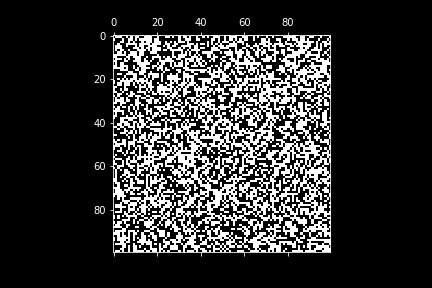

In [6]:
plt.rcParams["image.cmap"] = "binary"
fig, ax = plt.subplots()
im = plt.matshow(automaton.configuration, fignum=0)
animate = lambda *args: im.set_data(next(automaton))
anim = FuncAnimation(fig, animate)

Total runtime is around `2.3s` on a `Intel(R) Core(TM) i5-8365U CPU @ 1.60GHz`.